In [1]:
from visualiser import plot_ims
import cPickle as pickle
import matplotlib.pyplot as plt
%matplotlib inline
import utils
from hlt import *
import math

In [35]:
with open('dumps/gameMap_smartfrontier_50','rb') as f:
    myID,gameMap = pickle.load(f)

In [36]:
def attractiveness(site):
    return (255.-site.strength)/255 + site.production/30.

def map_attractiveness(myID,gameMap):
    for y in range(gameMap.height):
        for x in range(gameMap.width):
            loc = Location(x,y)
            site = gameMap.getSite(loc)
            if site.owner == myID:
                site.attractiveness = -999
            else:
                site.attractiveness = attractiveness(site)
            site.potential_attr = site.attractiveness

In [37]:
def find_inner(myID,locsites):
    inner = []
    for x,y,loc in locslist:
        if locsites[(loc,0)].owner == myID:
            inner.append(loc)
    return inner

In [38]:
locsmap = {(x,y):Location(x,y) for x in range(gameMap.width) for y in range(gameMap.height)}
locslist = [(x,y,Location(x,y)) for x in range(gameMap.width) for y in range(gameMap.height)]
locsmap_d = {(loc,d):gameMap.getLocation(loc,d) for loc in locsmap.values() for d in DIRECTIONS}
locsites = {(loc,d):gameMap.getSite(loc,d) for loc in locsmap.values() for d in DIRECTIONS}

In [39]:
frontier = utils.find_frontier(myID,gameMap)
inner = find_inner(myID,locsites)

In [71]:
map_attractiveness(myID,gameMap)

In [72]:
len(frontier)

38

In [82]:
inner_set = set(inner)
frontier_set = set(frontier)
total_set = inner_set.union(frontier_set)
visited = set()
sorted_nodes = [(f,locsites[(f,0)].attractiveness) for f in frontier]
sorted_nodes.sort(key=lambda x:x[1])
potentials = {loc:None for loc in inner}
for loc in frontier:
    potentials[loc] = locsites[(loc,0)].potential_attr

In [83]:
current,value = sorted_nodes.pop()

In [85]:
current,value

(loc(22,4), 1.16078431372549)

In [86]:
visited.add(current)

In [87]:
visited

{loc(22,4)}

In [ ]:
for d in CARDINALS:
    new_loc = locsmap_d[(current,d)]
    if not new_loc in inner_set or new_loc in visited:
        continue
    potentials[new_loc] = potentials[loc] - d
    sorted_nodes.append((new_loc,potentials[new_loc]))
    sorted_nodes.sort(key=lambda x:x[1])

In [88]:
potentials

{loc(15,0): 0.5274509803921569,
 loc(14,1): 0.6705882352941176,
 loc(23,0): 0.8196078431372549,
 loc(16,29): 0.8254901960784313,
 loc(16,28): 0.8784313725490196,
 loc(24,29): 0.8490196078431372,
 loc(24,28): 0.8392156862745098,
 loc(13,8): None,
 loc(13,4): None,
 loc(13,7): None,
 loc(13,5): None,
 loc(13,6): None,
 loc(13,3): None,
 loc(13,2): None,
 loc(14,3): None,
 loc(14,6): None,
 loc(14,4): None,
 loc(14,2): None,
 loc(14,7): None,
 loc(14,5): None,
 loc(14,8): None,
 loc(17,7): None,
 loc(17,1): None,
 loc(17,5): None,
 loc(17,8): None,
 loc(17,6): None,
 loc(17,2): None,
 loc(17,4): None,
 loc(17,0): None,
 loc(17,3): None,
 loc(15,1): None,
 loc(15,2): None,
 loc(16,8): None,
 loc(15,6): None,
 loc(15,3): None,
 loc(16,2): None,
 loc(16,5): None,
 loc(15,8): None,
 loc(16,3): None,
 loc(15,9): None,
 loc(15,4): None,
 loc(16,4): None,
 loc(16,7): None,
 loc(16,1): None,
 loc(15,5): None,
 loc(16,0): None,
 loc(16,6): None,
 loc(15,7): None,
 loc(19,6): None,
 loc(19,29): Non

In [101]:
def map_potential(inner,frontier,decay):
    inner_set = set(inner)
    frontier_set = set(frontier)
    total_set = inner_set.union(frontier_set)
    visited = set()
    sorted_nodes = [(f,locsites[(f,0)].attractiveness) for f in frontier]
    sorted_nodes.sort(key=lambda x:x[1])
    potentials = {loc:None for loc in inner}
    for loc in frontier:
        potentials[loc] = locsites[(loc,0)].potential_attr
    while len(sorted_nodes)>0:
        current,value = sorted_nodes.pop()
        for d in CARDINALS:
            new_loc = locsmap_d[(current,d)]
            if not new_loc in inner_set or new_loc in visited:
                continue
            potentials[new_loc] = potentials[current] - decay
            sorted_nodes.append((new_loc,potentials[new_loc]))
            sorted_nodes.sort(key=lambda x:x[1])
            visited.add(current)
    for loc in inner:
        locsites[(loc,0)].potential_attr = potentials[loc]
    for loc in inner:
        locsites[(loc,0)].direction = max([d for d in CARDINALS], key= lambda x:locsites[(loc,x)].potential_attr)
        

In [64]:
l = [1,2,3]

In [76]:
for x,y,loc in locslist:
    if loc in frontier or loc in inner:
        continue
    locsites[(loc,0)].potential_attr = 0

In [118]:
map_potential(inner,frontier,decay=.1)

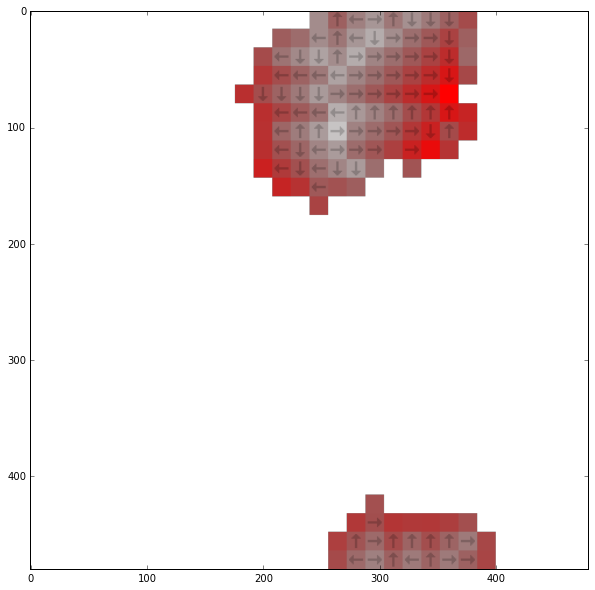

In [119]:
state = {
    'arrows':'direction',
    'heat':'potential_attr'
}

plt.figure(figsize=(10,10))
_ = plot_ims(gameMap,state)